# Grundlagen 5: k-Nearest Neighbour

## Die Idee hinter k-Nearest Neighbour

Liegen bereits klassifizierte Daten vor, so können neu hinzukommende Daten auf _Ähnlichkeit_ zu den vorhandenen Daten untersucht und klassifiziert werden. Man such unter den gegebenen Daten den Datensatz heraus, der den neuen Daten am ähnlichsten ist, und bestimmt so die Klasse für den neuen Datensatz. 

## Abstände und Metriken

_Ähnlichkeit_ ist hierbei so zu verstehen, dass der __Abstand__ zwischen zwei Punkten im Datenraum bzgl. einer vorgegebenen __Metrik__ berechnet wird. Durch eine Metrik wird auf der Menge der Daten eine Abstandsfunktion definiert. Beispiele für Metriken sind

$$ d_{\text{eukl}} := \sqrt(\sum_{k=1}^N (x_k - y_k)^2) \,\,\ (\text{Euklidische Metrik})$$
$$ d_{max} := \max_{k=1}^N |x_k - y_k)| \,\,\ (\text{Maximum-Metrik})$$
$$ d_{\text{m}} := \sum_{k=1}^N |x_k - y_k)| \,\,\ (\text{Manhattan-Metrik})$$

Die Metrik ist dabei dem Problem entsprechend zu wählen.

Das Problem der Klassifizierung wird dadurch zu einer Suche nach dem nächstgelegenen Datensatz, was der Methode ihren Namen gibt. Es findet also kein echtes Lernen statt; die Klassifizierung erfordert vielmehr die Durchsuchung alller bereits klassifizierten Daten für jeden neuen Datensatz, was recht aufwändig werden kann. Die Implementierung ist recht einfach, der Suchprozess kann aber lange dauern.


## Implementierung von Nearest Neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition möglicher Metriken
Für die oben beschriebene Metriken existieren in `Numpy` bereits eigene Funktionen; wir definieren sie hier trotzdem explizit:

In [2]:
def d_eukl2(x: float, y: float) -> float:
    """ Das Quadrat der euklidischen Metrik """
    return np.sum((x - y) * (x - y))

def d_max(x: float, y: float) -> float:
    """ Die Maximums-Metrik """
    return np.max(np.abs(x - y))

def d_manh(x: float, y: float) -> float:
    """ Die Manhattan-Metrik """
    return np.sum(np.abs(x - y))
    

### Der Algorithmus

In [3]:
def nearest_neighbour(X, y, x_neu, dist = d_eukl2):
    """ 
    Sucht für den neuen Datenpunkt x_neu den bzgl. der gegebenen Metrik dist 
    nächstgelegenen Punkt aus der Datenmenge X 
    """
    d_min = float('inf')
    x0 = y0 = None
    for x, y in zip(X,y):
        d = dist(x,x_neu)
        if d < d_min:
            x0, y0, d_min = x, y, d
    return x0, y0, d_min

## Beispiele

In [4]:
import matplotlib
plt.set_cmap('prism')
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

<Figure size 640x480 with 0 Axes>

### Zufällig erzeugte Daten

In [5]:
import sklearn.datasets as ds

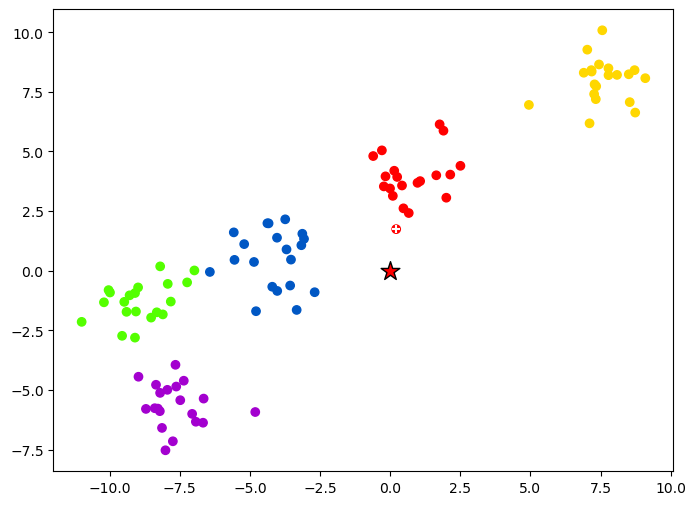

In [6]:
n_centers = 5

X, y = ds.make_blobs(n_samples = 100, n_features = 2, centers = n_centers,   random_state = 3)
x1 = (0,0)

n1, y1, _ = nearest_neighbour(X, y, x1, dist=d_eukl2)

plt.scatter(X[:,0], X[:, 1],c = y)
plt.scatter(*n1, marker = '+', c = 'white')
plt.scatter(*x1, c = y1, marker='*', s = 200, 
            norm = plt.Normalize(vmin = np.min(y), vmax = np.max(y)), edgecolors = 'black')

plt.show()

## Probleme mit Nearest Neighbour $ \rightarrow $ k-Nearest Neighbour

Einzelne Ausreißer können das Verfahren empfindlich stören. Liegt ein solcher Ausreißer in einem Cluster und ist der nächste Nachbar des betrachteten Punkts, so wird dieser fälschlicherweise dem Cluster des Ausreißers zugeordnet. Ein praktikables Vorgehen ist es daher, nicht nur den nächsten Punkt, sondern die nächstgelegenen $k$ Punkte für die Zuordnung einzubeziehen, z.B. durch einen "Mehrheistentscheid. Man gelangt zu zum __k-Nearest-Neighbour-Verfahren__.

### Der Algorithmus

In [7]:
def dist_set(x, Y, dist):
    """ Berechnet den Abstand eines Punktes x zu einer Menge X mit der Abstandsfunktion dist """
    dists = [dist(x,y) for y in Y]
    return np.min(dists)

def k_nearest_neighbour(X, y, x_neu, k = 5, dist = d_eukl2):
    """ 
    Sucht für den neuen Datenpunkt x_neu die bzgl. der gegebenen Metrik dist 
    die k nächstgelegenen Punkte aus der Datenmenge X. 
    """
    distances = [dist(x_neu, x) for x in X]
    neighbours = np.argsort(distances)[:k]
    return X[neighbours], y[neighbours], modus(y[neighbours])

def modus(x):
    vals, counts = np.unique(x, return_counts = True)
    return vals[np.argmax(counts)]


### Beispiele

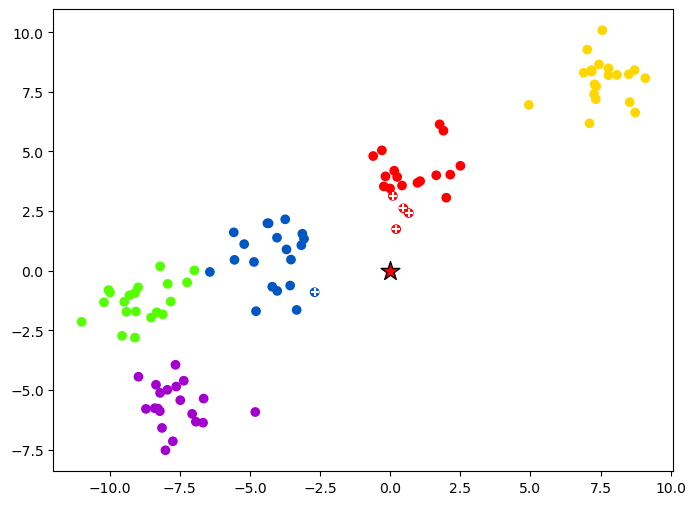

In [8]:
n_centers = 5

X, y = ds.make_blobs(n_samples = 100, n_features = 2, centers = n_centers,   random_state = 3)
x1 = (0,0)
nk, yk, cls = k_nearest_neighbour(X, y, x1,5)


plt.scatter(X[:,0], X[:, 1], c = y)
plt.scatter(nk[:,0], nk[:,1], c = 'white', marker = '+')
plt.scatter(*x1, c = cls, marker='*', s = 200, 
            norm = plt.Normalize(vmin = np.min(y), vmax = np.max(y)), edgecolors = 'black')


plt.show()

## Links

* Metrische Räume $\rightarrow$ [Wikipedia](https://de.wikipedia.org/wiki/Metrischer_Raum)